# ADEGuard Project

## Step 1: Data Collection & Understanding
### Goal: Gather and understand vaccine, symptom, and ADE narrative data from VAERS dataset

In [6]:
# Install required packages in current kernel environment
%pip install pandas numpy matplotlib seaborn pathlib2
print("✓ Basic packages installed in current kernel")

Note: you may need to restart the kernel to use updated packages.
✓ Basic packages installed in current kernel



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Check current Python environment and installed packages
import sys
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")
print(f"Python path: {sys.path[:3]}...")  # Show first 3 paths

# Try to check if pandas is already installed
try:
    import pandas as pd
    print(f"✓ Pandas is already available: {pd.__version__}")
except ImportError:
    print("✗ Pandas not found in current environment - will install above")

Python executable: c:\Users\dell\AppData\Local\Programs\Python\Python311\python.exe
Python version: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Python path: ['c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib']...
✓ Pandas is already available: 2.3.3


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1.1 Load VAERS Datasets

In [9]:
# Define file paths
data_dir = Path('datasets')
vaers_data_file = data_dir / '2025VAERSDATA.csv'
vaers_symptoms_file = data_dir / '2025VAERSSYMPTOMS.csv'
vaers_vax_file = data_dir / '2025VAERSVAX.csv'
# Check if files exist\n",
for file_path in [vaers_data_file, vaers_symptoms_file, vaers_vax_file]:
    if file_path.exists():
        print(f"✓ {file_path.name} found")
    else:
        print(f"✗ {file_path.name} NOT found")

✓ 2025VAERSDATA.csv found
✓ 2025VAERSSYMPTOMS.csv found
✓ 2025VAERSVAX.csv found


In [10]:
# Load VAERS datasets
print("Loading VAERS datasets...")

# Main data file - patient demographics and case details
try:
    vaers_data = pd.read_csv(vaers_data_file, encoding='latin-1', low_memory=False)
    print(f"✓ VAERS Data loaded: {vaers_data.shape[0]} records, {vaers_data.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading VAERS Data: {e}")

# Symptoms file - structured symptom codes
try:
    vaers_symptoms = pd.read_csv(vaers_symptoms_file, encoding='latin-1', low_memory=False)
    print(f"✓ VAERS Symptoms loaded: {vaers_symptoms.shape[0]} records, {vaers_symptoms.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading VAERS Symptoms: {e}")

# Vaccine file - vaccine information
try:
    vaers_vax = pd.read_csv(vaers_vax_file, encoding='latin-1', low_memory=False)
    print(f"✓ VAERS Vaccines loaded: {vaers_vax.shape[0]} records, {vaers_vax.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading VAERS Vaccines: {e}")

Loading VAERS datasets...
✓ VAERS Data loaded: 20227 records, 36 columns
✓ VAERS Symptoms loaded: 24721 records, 12 columns
✓ VAERS Vaccines loaded: 27241 records, 9 columns
✓ VAERS Data loaded: 20227 records, 36 columns
✓ VAERS Symptoms loaded: 24721 records, 12 columns
✓ VAERS Vaccines loaded: 27241 records, 9 columns


## 1.2 Explore Dataset Structure

In [11]:
# Examine VAERS Data structure
print("=== VAERS DATA STRUCTURE ===")
print(f"Shape: {vaers_data.shape}")
print(f"\nColumns: {list(vaers_data.columns)}")
print(f"\nData Types:")
print(vaers_data.dtypes)

=== VAERS DATA STRUCTURE ===
Shape: (20227, 36)

Columns: ['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'ORDER']

Data Types:
VAERS_ID          int64
RECVDATE         object
STATE            object
AGE_YRS         float64
CAGE_YR         float64
CAGE_MO         float64
SEX              object
RPT_DATE         object
SYMPTOM_TEXT     object
DIED             object
DATEDIED         object
L_THREAT         object
ER_VISIT         object
HOSPITAL         object
HOSPDAYS        float64
X_STAY           object
DISABLE          object
RECOVD           object
VAX_DATE         object
ONSET_DATE       object
NUMDAYS         flo

In [12]:
# Display first few records
print("\n=== FIRST 5 RECORDS - VAERS DATA ===")
vaers_data.head()


=== FIRST 5 RECORDS - VAERS DATA ===



=== FIRST 5 RECORDS - VAERS DATA ===


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,ORDER
0,2815014,01/01/2025,NJ,37.0,37.0,NaN,F,NaN,received the SHINGRIX vaccine instead of the F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/03/2024,12/03/2024,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USGSKUS2024AMR152842,2,01/01/2025,NaN,NaN,NaN,NaN,2
1,2818783,01/01/2025,OH,57.0,57.0,NaN,F,NaN,Pain down arm and weakness for a few days afte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,09/08/2024,09/08/2024,0.0,No medical tests at this point. I contacted m...,PHM,NaN,"Lisinopril, omeprazole, naproxen, levocetirizi...",NaN,"high blood pressure, acid reflux, arthritis","soreness in arm after Covid shot, typically la...",NaN,2,01/01/2025,NaN,Y,NaN,percocet,2
2,2818864,01/01/2025,OK,1.0,1.0,0.0,U,NaN,No additional AE; HCP called and reported admi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,10/17/2024,10/17/2024,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,US0095075132412USA010369,2,12/31/2024,NaN,NaN,NaN,NaN,1
3,2818865,01/01/2025,CO,0.5,NaN,NaN,F,NaN,one of them only received the DTaP-IPV part an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,11/22/2024,11/22/2024,0.0,NaN,UNK,NaN,HEPATITIS B [HEPATITIS B VACCINE]; PREVNAR 20;...,NaN,NaN,NaN,USSA2024SA385084,2,12/31/2024,NaN,NaN,NaN,NaN,1
4,2818871,01/01/2025,VA,2.0,2.0,0.2,F,NaN,Incorrect storage of drug/received Havrix vacc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,08/20/2024,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USGSKUS2024AMR153922,2,01/01/2025,NaN,NaN,NaN,NaN,1


In [13]:
# Examine VAERS Symptoms structure
print("=== VAERS SYMPTOMS STRUCTURE ===")
print(f"Shape: {vaers_symptoms.shape}")
print(f"\nColumns: {list(vaers_symptoms.columns)}")
print(f"\nFirst 5 records:")
vaers_symptoms.head()

=== VAERS SYMPTOMS STRUCTURE ===
Shape: (24721, 12)

Columns: ['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'ORDER']

First 5 records:


=== VAERS SYMPTOMS STRUCTURE ===
Shape: (24721, 12)

Columns: ['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'ORDER']

First 5 records:


,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,ORDER
0,791393,Coronary artery bypass,28.0,Dialysis,28.0,End stage renal disease,28.0,Herpes zoster,28.0,Pain in extremity,28.0,2
1,791393,Vaccination failure,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,791393,Coronary artery bypass,28.0,Dialysis,28.0,End stage renal disease,28.0,Herpes zoster,28.0,Pain,28.0,3
3,791393,Pain in extremity,28.0,Vaccination failure,28.0,NaN,NaN,NaN,NaN,NaN,NaN,3
4,791747,Amenorrhoea,28.0,General physical health deterioration,28.0,Laboratory test,28.0,Malaise,28.0,Menopause,28.0,2


In [14]:
# Examine VAERS Vaccines structure
print("=== VAERS VACCINES STRUCTURE ===")
print(f"Shape: {vaers_vax.shape}")
print(f"\nColumns: {list(vaers_vax.columns)}")
print(f"\nFirst 5 records:")
vaers_vax.head()

=== VAERS VACCINES STRUCTURE ===
Shape: (27241, 9)

Columns: ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'ORDER']

First 5 records:


=== VAERS VACCINES STRUCTURE ===
Shape: (27241, 9)

Columns: ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'ORDER']

First 5 records:


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,791393,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,NaN,NaN,ZOSTER (SHINGRIX),2
1,791393,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,1,IM,LA,ZOSTER (SHINGRIX),2
2,791393,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,NaN,NaN,ZOSTER (SHINGRIX),3
3,791393,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,1,IM,LA,ZOSTER (SHINGRIX),3
4,791747,VARZOS,MERCK & CO. INC.,NaN,UNK,OT,NaN,ZOSTER LIVE (ZOSTAVAX),2


## 1.3 Key Field Analysis

In [15]:
# Analyze key demographic fields
print("=== DEMOGRAPHIC ANALYSIS ===")
print(f"Age distribution (AGE_YRS):")
print(vaers_data['AGE_YRS'].describe())

print(f"\nSex distribution:")
print(vaers_data['SEX'].value_counts())

print(f"\nState distribution (top 10):")
print(vaers_data['STATE'].value_counts().head(10))

=== DEMOGRAPHIC ANALYSIS ===
Age distribution (AGE_YRS):
count    14678.000000
mean        40.956961
std         28.198597
min          0.080000
25%         12.000000
50%         46.000000
75%         66.000000
max        110.000000
Name: AGE_YRS, dtype: float64

Sex distribution:
SEX
F    10631
M     6736
U      547
Name: count, dtype: int64

State distribution (top 10):
STATE
CA    1471
FL    1190
TX    1158
MI     740
PA     686
NY     673
GA     581
OH     525
NC     504
VA     484
Name: count, dtype: int64


In [16]:
# Analyze vaccine types
print("=== VACCINE ANALYSIS ===")
print(f"Vaccine types (VAX_TYPE):")
print(vaers_vax['VAX_TYPE'].value_counts().head(10))

print(f"\nVaccine manufacturers (VAX_MANU):")
print(vaers_vax['VAX_MANU'].value_counts().head(10))

=== VACCINE ANALYSIS ===
Vaccine types (VAX_TYPE):
VAX_TYPE
COVID19    5274
VARZOS     3904
PNC20      1421
FLU3       1363
TDAP       1292
HPV9       1086
HEP        1023
RSV        1007
MMR        1007
HEPA        784
Name: count, dtype: int64

Vaccine manufacturers (VAX_MANU):
VAX_MANU
GLAXOSMITHKLINE BIOLOGICALS          7359
MERCK & CO. INC.                     5040
PFIZER\BIONTECH                      2856
SANOFI PASTEUR                       2825
UNKNOWN MANUFACTURER                 2404
MODERNA                              2176
PFIZER\WYETH                         1974
NOVARTIS VACCINES AND DIAGNOSTICS     866
SEQIRUS, INC.                         379
MSP VACCINE COMPANY                   335
Name: count, dtype: int64


In [17]:
# Analyze symptom patterns
print("=== SYMPTOM ANALYSIS ===")
if 'SYMPTOM1' in vaers_symptoms.columns:
    print(f"Most common symptoms (SYMPTOM1):")
    print(vaers_symptoms['SYMPTOM1'].value_counts().head(15))
else:
    print("Checking available symptom columns...")
    symptom_cols = [col for col in vaers_symptoms.columns if 'SYMPTOM' in col.upper()]
    print(f"Available symptom columns: {symptom_cols}")
    if symptom_cols:
        print(f"\nSample values from {symptom_cols[0]}:")
        print(vaers_symptoms[symptom_cols[0]].value_counts().head(15))

=== SYMPTOM ANALYSIS ===
Most common symptoms (SYMPTOM1):
SYMPTOM1
No adverse event                                        1399
Extra dose administered                                 1235
Expired product administered                             879
Injection site erythema                                  810
Herpes zoster                                            680
Inappropriate schedule of product administration         665
Arthralgia                                               570
Erythema                                                 491
COVID-19                                                 474
Product administered to patient of inappropriate age     464
Product storage error                                    459
Dizziness                                                402
Incomplete course of vaccination                         364
Chills                                                   352
Rash                                                     334
Name: count, dtype

## 1.4 Free-text Analysis

In [18]:
# Find free-text narrative columns
print("=== FREE-TEXT NARRATIVE ANALYSIS ===")
text_columns = []
for col in vaers_data.columns:
    if any(keyword in col.upper() for keyword in ['SYMPTOM_TEXT', 'NARRATIVE', 'DESCRIPTION', 'TEXT']):
        text_columns.append(col)

print(f"Potential free-text columns: {text_columns}")

# If no obvious text columns, check for long string fields
if not text_columns:
    print("\nChecking for long text fields...")
    for col in vaers_data.columns:
        if vaers_data[col].dtype == 'object':
            avg_length = vaers_data[col].astype(str).str.len().mean()
            if avg_length > 50:  # Likely narrative text
                text_columns.append(col)
                print(f"{col}: Average length = {avg_length:.1f} characters")

=== FREE-TEXT NARRATIVE ANALYSIS ===
Potential free-text columns: ['SYMPTOM_TEXT']


In [19]:
# Analyze free-text narratives if found
if text_columns:
    main_text_col = text_columns[0]
    print(f"\nAnalyzing {main_text_col}:")
    
    # Basic statistics
    text_lengths = vaers_data[main_text_col].astype(str).str.len()
    print(f"Text length statistics:")
    print(text_lengths.describe())
    
    # Sample narratives
    print(f"\nSample narratives:")
    sample_texts = vaers_data[main_text_col].dropna().sample(3)
    for i, text in enumerate(sample_texts, 1):
        print(f"\nSample {i}:")
        print(f"{text[:500]}..." if len(str(text)) > 500 else text)
else:
    print("No clear free-text narrative columns identified.")


Analyzing SYMPTOM_TEXT:
Text length statistics:
count    20227.000000
mean       875.700302
std       1170.573971
min          2.000000
25%        136.000000
50%        461.000000
75%       1267.000000
max      31985.000000
Name: SYMPTOM_TEXT, dtype: float64

Sample narratives:

Sample 1:
Mom reported - flu symptoms, mild fever, blood in stool

Sample 2:
Severe Headache

Sample 3:
menveo was given to a patient by mistake; menveo was given to a patient by mistake; had Menactra first dose and received Menveo second dose; This non-serious case was reported by a other health professional via call center representative and described the occurrence of extra dose administered in a 18-year-old female patient who received Men ACWY-CRM NVS (Menveo) (batch number 7GF79, expiry date 31-DEC-2025) for prophylaxis.   Co-suspect products included Men ACWY-CRM NVS (Menveo) (batch number A...


## 1.5 Data Quality Assessment

In [20]:
# Check for missing values
print("=== DATA QUALITY ASSESSMENT ===")
print("\nMissing values in VAERS Data:")
missing_data = vaers_data.isnull().sum()
missing_pct = (missing_data / len(vaers_data)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Percentage', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0].head(10))

=== DATA QUALITY ASSESSMENT ===

Missing values in VAERS Data:
              Missing_Count  Missing_Percentage
X_STAY                20211           99.920898
BIRTH_DEFECT          20209           99.911010
ER_VISIT              20204           99.886291
RPT_DATE              20170           99.718198
V_FUNDBY              20166           99.698423
DATEDIED              19953           98.645375
L_THREAT              19844           98.106491
DIED                  19817           97.973006
PRIOR_VAX             19685           97.320413
HOSPDAYS              19542           96.613437


In [21]:
# Check data completeness for key fields
key_fields = ['AGE_YRS', 'SEX', 'STATE']
print(f"\nData completeness for key fields:")
for field in key_fields:
    if field in vaers_data.columns:
        completeness = (vaers_data[field].notna().sum() / len(vaers_data)) * 100
        print(f"{field}: {completeness:.1f}% complete")
    else:
        print(f"{field}: Column not found")


Data completeness for key fields:
AGE_YRS: 72.6% complete
SEX: 88.6% complete
STATE: 82.7% complete


## 1.6 Data Integration

In [22]:
# Merge datasets on VAERS_ID for comprehensive view
print("=== DATA INTEGRATION ===")

# Check if VAERS_ID exists in all datasets
id_col = 'VAERS_ID'
datasets = {'data': vaers_data, 'symptoms': vaers_symptoms, 'vax': vaers_vax}

for name, df in datasets.items():
    if id_col in df.columns:
        unique_ids = df[id_col].nunique()
        total_records = len(df)
        print(f"{name.upper()}: {unique_ids} unique IDs, {total_records} total records")
    else:
        print(f"{name.upper()}: {id_col} column not found")
        print(f"Available columns: {list(df.columns)[:5]}...")

=== DATA INTEGRATION ===
DATA: 19980 unique IDs, 20227 total records
SYMPTOMS: 19980 unique IDs, 24721 total records
VAX: 19980 unique IDs, 27241 total records


In [23]:
# Create integrated dataset (if VAERS_ID exists)
if id_col in vaers_data.columns and id_col in vaers_vax.columns:
    print("\nCreating integrated dataset...")
    
    # Start with main data
    integrated_df = vaers_data.copy()
    
    # Add vaccine information
    integrated_df = integrated_df.merge(
        vaers_vax, 
        on=id_col, 
        how='left', 
        suffixes=('', '_vax')
    )
    
    # Add symptom information if available
    if id_col in vaers_symptoms.columns:
        integrated_df = integrated_df.merge(
            vaers_symptoms, 
            on=id_col, 
            how='left', 
            suffixes=('', '_symp')
        )
    
    print(f"Integrated dataset shape: {integrated_df.shape}")
    print(f"Columns: {len(integrated_df.columns)}")
    
    # Save integrated dataset for next steps
    integrated_df.to_csv('datasets/vaers_integrated.csv', index=False)
    print("✓ Integrated dataset saved as 'vaers_integrated.csv'")
else:
    print("Cannot create integrated dataset - missing VAERS_ID column")


Creating integrated dataset...
Integrated dataset shape: (38287, 55)
Columns: 55
✓ Integrated dataset saved as 'vaers_integrated.csv'
✓ Integrated dataset saved as 'vaers_integrated.csv'


## 1.7 Summary Statistics

In [24]:
# Generate summary report
print("=== DATASET SUMMARY REPORT ===")
print(f"""n    Dataset Overview:
    - Total ADE reports: {len(vaers_data):,}
    - Vaccine records: {len(vaers_vax):,}
    - Symptom records: {len(vaers_symptoms):,}
    - Time period: 2025 VAERS data
    
    Key Fields Identified:
    - Patient demographics: AGE_YRS, SEX, STATE
    - Vaccine info: VAX_TYPE, VAX_MANU
    - Symptoms: Structured codes + Free-text narratives
    
    Data Quality:
    - Age data completeness: {(vaers_data['AGE_YRS'].notna().sum() / len(vaers_data) * 100):.1f}%
    - Sex data completeness: {(vaers_data['SEX'].notna().sum() / len(vaers_data) * 100):.1f}%
    - Vaccine type completeness: {(vaers_vax['VAX_TYPE'].notna().sum() / len(vaers_vax) * 100):.1f}%
""")

print("✓ Step 1 completed: Data Collection & Understanding")
print("Next: Proceed to Step 2 - Gold Data Annotation")

=== DATASET SUMMARY REPORT ===
n    Dataset Overview:
    - Total ADE reports: 20,227
    - Vaccine records: 27,241
    - Symptom records: 24,721
    - Time period: 2025 VAERS data

    Key Fields Identified:
    - Patient demographics: AGE_YRS, SEX, STATE
    - Vaccine info: VAX_TYPE, VAX_MANU
    - Symptoms: Structured codes + Free-text narratives

    Data Quality:
    - Age data completeness: 72.6%
    - Sex data completeness: 88.6%
    - Vaccine type completeness: 100.0%

✓ Step 1 completed: Data Collection & Understanding
Next: Proceed to Step 2 - Gold Data Annotation


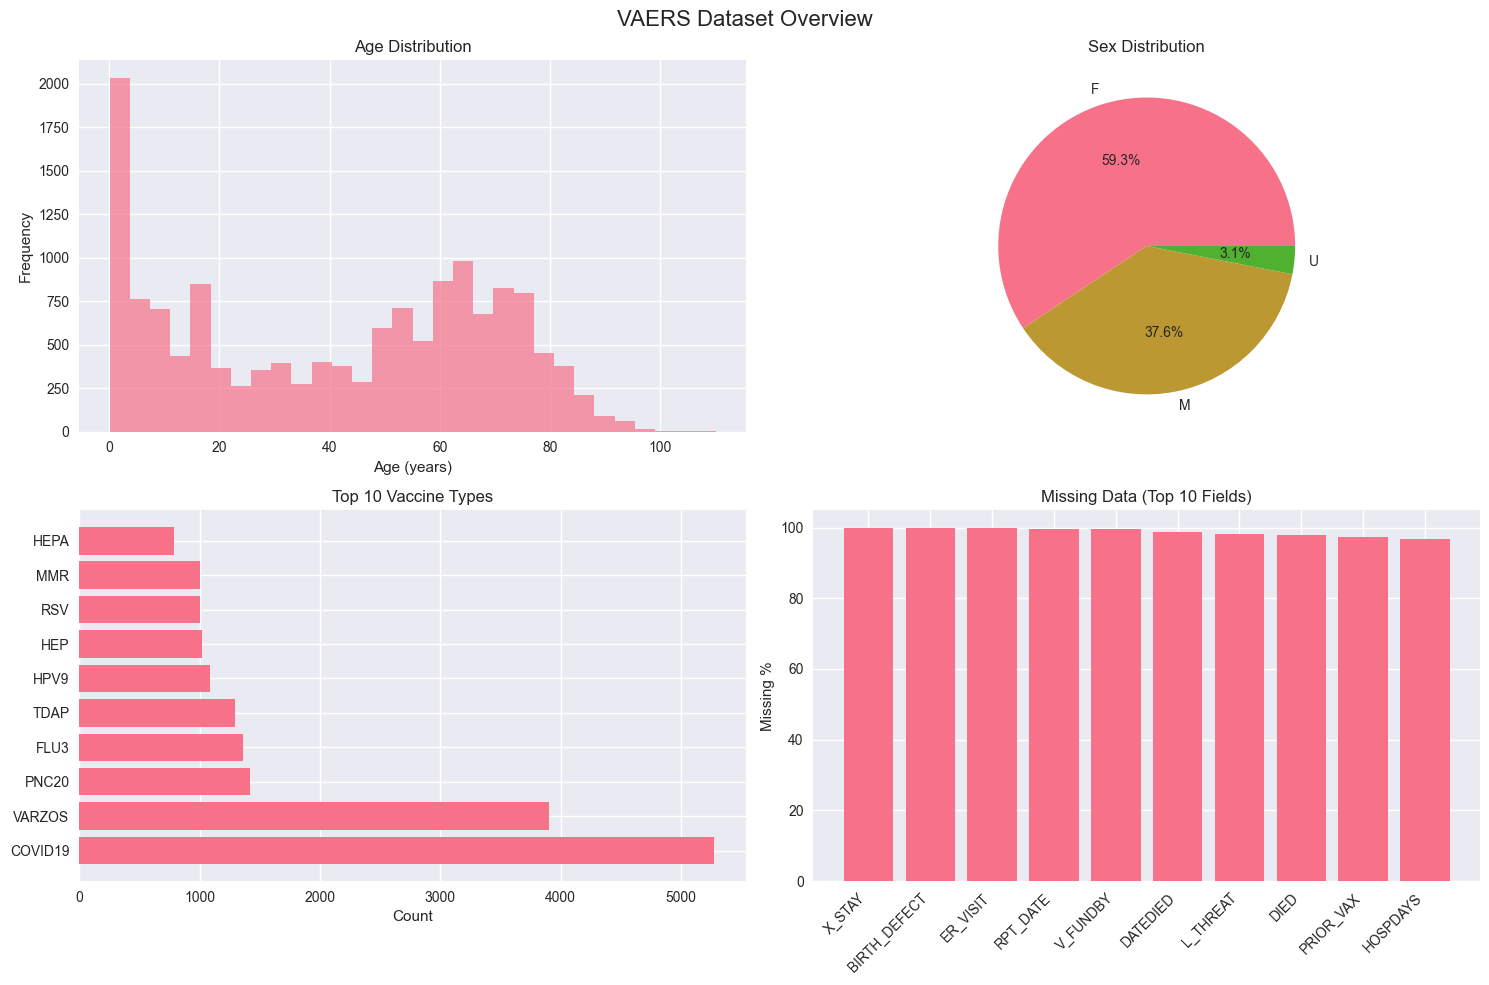

✓ Dataset overview visualization saved as 'vaers_dataset_overview.png'


In [25]:
# Create visualization of key statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('VAERS Dataset Overview', fontsize=16)

# Age distribution
axes[0,0].hist(vaers_data['AGE_YRS'].dropna(), bins=30, alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Frequency')

# Sex distribution
sex_counts = vaers_data['SEX'].value_counts()
axes[0,1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Sex Distribution')

# Top vaccine types
top_vax = vaers_vax['VAX_TYPE'].value_counts().head(10)
axes[1,0].barh(range(len(top_vax)), top_vax.values)
axes[1,0].set_yticks(range(len(top_vax)))
axes[1,0].set_yticklabels(top_vax.index)
axes[1,0].set_title('Top 10 Vaccine Types')
axes[1,0].set_xlabel('Count')

# Missing data heatmap (top 10 columns with most missing data)
missing_top10 = missing_df.head(10)
axes[1,1].bar(range(len(missing_top10)), missing_top10['Missing_Percentage'])
axes[1,1].set_xticks(range(len(missing_top10)))
axes[1,1].set_xticklabels(missing_top10.index, rotation=45, ha='right')
axes[1,1].set_title('Missing Data (Top 10 Fields)')
axes[1,1].set_ylabel('Missing %')

plt.tight_layout()
plt.savefig('vaers_dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Dataset overview visualization saved as 'vaers_dataset_overview.png'")